# Purpose: Do analytically integrable functional fits from 1750-2011 to radiative shielding for land use change affect on albedo

Clear all variables and reset the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import csv
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17Forcings')

Read two input files separately and assign the year values and methane concentration data

In [2]:
df1 = pd.read_excel('heat17parameters27dec.xlsx')
df1.to_csv('heat18parameters27jun.csv',header=False,index=False)
df1 = pd.read_csv('heat18parameters27jun.csv')
df1.drop(df1.head(1).index, inplace=True)
df1.index = np.arange(0, len(df1))
# print (df1)

df2 = pd.read_csv('OtherForcings.csv')
df2.drop(df2.tail(5).index,inplace=True) # drop last 5 rows
# df2.drop(df2.head(6).index, inplace=True)
df2.index = np.arange(0, len(df2))
print (df2) 

     Year     CO2  GHG OTher*  O3 (Trop)  O3 (Strat)  Aerosol (Total)     LUC  \
0    1750  0.0000      0.0000     0.0000      0.0000           0.0000  0.0000   
1    1751 -0.0230      0.0040     0.0004      0.0000          -0.0018 -0.0004   
2    1752 -0.0237      0.0055     0.0008      0.0000          -0.0036 -0.0008   
3    1753 -0.0244      0.0070     0.0013      0.0000          -0.0054 -0.0012   
4    1754 -0.0250      0.0084     0.0017      0.0000          -0.0071 -0.0016   
5    1755 -0.0257      0.0099     0.0021      0.0000          -0.0089 -0.0020   
6    1756 -0.0264      0.0112     0.0025      0.0000          -0.0107 -0.0024   
7    1757 -0.0272      0.0125     0.0030      0.0000          -0.0125 -0.0028   
8    1758 -0.0279      0.0138     0.0034      0.0000          -0.0143 -0.0032   
9    1759 -0.0284      0.0149     0.0038      0.0000          -0.0161 -0.0036   
10   1760 -0.0288      0.0158     0.0042      0.0000          -0.0178 -0.0040   
11   1761 -0.0290      0.016

In [3]:
yrs = df2.iloc[:,0:1]
print (yrs)
shield = df2.iloc[:,6:7]
shield = shield.multiply(-1)
# shield = -data2[[All, 7]]
print (shield)
df3 = pd.merge(yrs, shield, left_index =True, right_index =True,how='outer')
df3 = df3.astype(float)
print(df3)



     Year
0    1750
1    1751
2    1752
3    1753
4    1754
5    1755
6    1756
7    1757
8    1758
9    1759
10   1760
11   1761
12   1762
13   1763
14   1764
15   1765
16   1766
17   1767
18   1768
19   1769
20   1770
21   1771
22   1772
23   1773
24   1774
25   1775
26   1776
27   1777
28   1778
29   1779
..    ...
232  1982
233  1983
234  1984
235  1985
236  1986
237  1987
238  1988
239  1989
240  1990
241  1991
242  1992
243  1993
244  1994
245  1995
246  1996
247  1997
248  1998
249  1999
250  2000
251  2001
252  2002
253  2003
254  2004
255  2005
256  2006
257  2007
258  2008
259  2009
260  2010
261  2011

[262 rows x 1 columns]
        LUC
0   -0.0000
1    0.0004
2    0.0008
3    0.0012
4    0.0016
5    0.0020
6    0.0024
7    0.0028
8    0.0032
9    0.0036
10   0.0040
11   0.0044
12   0.0048
13   0.0052
14   0.0056
15   0.0060
16   0.0064
17   0.0068
18   0.0072
19   0.0076
20   0.0080
21   0.0084
22   0.0088
23   0.0092
24   0.0096
25   0.0100
26   0.0104
27   0.0108
28   0.0

Note that the earth's albedo from 2000-2012 varied seasonally by no more than plus or minus 4% over an average of 0.3 with no evident secular trend NASA Earth Observatory, Measuring Earth's Albedo, 21 October 2014, https://earthobservatory.nasa.gov/IOTD/view.php?id=84499

[1.47683753e-01 1.95233768e+03 2.00587418e+01 8.51144200e+00
 1.89305312e+03 4.29433103e+01]


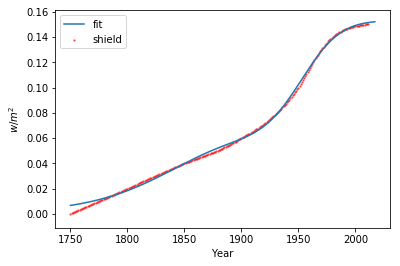

268
268
256
0.15059454113732554


In [4]:
yrs = yrs['Year'].tolist()
yrs = list(map(float, yrs))

shield= shield['LUC'].tolist()
shield = list(map(float, shield))

def dudt(t,b5,b6):
    y = np.gradient(1/(1 + np.exp(-(t - b5)/b6)),t)
    return y

def fit(t,b1,b2,b3,b4,b5,b6):
    y = b1/(1+np.exp(-(yrs-b2)/b3)) + b4*dudt(t,b5,b6)
    return y

param_bounds=([0,1900,0,0,1850,0],[0.5,2000,50,20,2000,50])
popt,pcov = curve_fit(fit, yrs, shield, bounds=param_bounds)
print (popt)

df3.plot.scatter(x="Year", y="LUC", color = 'r',label ='shield', s=2, alpha = 0.5)

yrs = range(1750,2018)
y = fit(yrs, *popt)
plt.plot(yrs,y, label="fit")
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('$w/m^2$') 
plt.savefig('albedo.eps',dpi=1000)
plt.savefig('albedo.pdf',dpi=1000)
plt.show()

# print (yrs)
print (len(yrs))
print (len(y))

itemindex = yrs.index(2006)
print(itemindex)
print(y[itemindex])

Year 1750 albedo and emissivity

In [5]:
c18 = 1359.49/4
albedo = 0.30 - y[itemindex]/c18
print (albedo)
# print ((1-albedo)*c18)

0.29955690871977775
